# Sentiment analysis using LSTM - Tamil language dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

In [2]:
df1=pd.read_csv("/kaggle/input/mydata2/ta-emotion10-trainset.csv",sep="\t",header=None)
df2=pd.read_csv("/kaggle/input/mydata2/ta-emotion10_test.csv",sep="\t",header=None)# INPUT DATA

# EXPLORE DATA

In [3]:
df1.head()

,0,1
0,Neutral,நாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂
1,Anger,மானம் கேட்ட அன்புமணி
2,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
3,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
4,Neutral,இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின...


In [4]:
df1.columns

Index([0, 1], dtype='int64')

In [5]:
df1.shape

(14208, 2)

In [6]:
df1.isna().sum()

0    0
1    0
dtype: int64

In [7]:
df2.shape

(3552, 2)

In [8]:
df2.isna().sum()

0    0
1    0
dtype: int64

In [9]:
# tRAIN lstm ON TRAIN AND TEST DATA

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load training data
train_data = pd.read_csv('/kaggle/input/mydata2/ta-emotion10-trainset.csv',header=None,sep="\t")  # Update with your training data path

# Preprocess training data
texts = train_data[1]
labels = train_data[0]

# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_train = pad_sequences(sequences)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)  # Fit encoder only on training data

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Save the model and tokenizer
model.save('your_model.h5')
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the test data
test_data = pd.read_csv('/kaggle/input/mydata2/ta-emotion10_test.csv',header=None,sep="\t")  # Update with your test data path
test_texts = test_data[1]

# Load the saved tokenizer and label encoder
import joblib
tokenizer = joblib.load('tokenizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Preprocess the test data similarly
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(test_sequences, maxlen=X_train.shape[1])  # Use the same length as training

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert class indices back to original labels
test_data['predicted_emotion'] = label_encoder.inverse_transform(predicted_classes)

# Save or display the test results
print(test_data[[1, 'predicted_emotion']])

# Optionally, save the results to a new CSV
test_data.to_csv('predicted_test_data.csv', index=False)
test_data.head()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3526 - loss: 2.0135 - val_accuracy: 0.4103 - val_loss: 1.7811
Epoch 2/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5258 - loss: 1.4212 - val_accuracy: 0.3871 - val_loss: 1.8978
Epoch 3/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8156 - loss: 0.5881 - val_accuracy: 0.3332 - val_loss: 2.3903
Epoch 4/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9460 - loss: 0.1919 - val_accuracy: 0.3297 - val_loss: 3.0300
Epoch 5/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9797 - loss: 0.0753 - val_accuracy: 0.3248 - val_loss: 3.4834
Epoch 6/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9885 - loss: 0.0442 - val_accuracy: 0.3213 - val_loss: 3.7885
Epoch 7/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9906 - loss: 0.0341 - val_accuracy: 0.3121 - val_loss: 3.9284
Epoch 8/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9928 - loss: 0.0252 - val_accu

,0,1,predicted_emotion
0,Joy,அருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் ந...,Joy
1,Anticipation,வேல்ராஜ் வேலையா தான் இருக்கும்,Neutral
2,Joy,அண்ணன் கிட்டுக்கு வாழ்த்துக்கள் 👍👍,Joy
3,Trust,ஆமா நானும் இதான் யோசித்தேன் 🤣🤣,Trust
4,Anticipation,மொத்த மக்களும் ஒன்னு சேர்ந்தாதான் இந்த அரசாங்க...,Trust


In [11]:
accuracy = accuracy_score(test_data[0], test_data['predicted_emotion'])

print(f'Inference accuracy score: {accuracy:.2f}')

Inference accuracy score: 0.29


In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load and preprocess the training data
train_data = pd.read_csv('/kaggle/input/mydata2/ta-emotion10-trainset.csv', header=None, sep="\t")
texts = train_data[1].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))  # Clean text
labels = train_data[0]

# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_train = pad_sequences(sequences)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)

# Build the improved LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save the model and tokenizer
model.save('your_model.h5')
joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load and preprocess the test data
test_data = pd.read_csv('/kaggle/input/mydata2/ta-emotion10_test.csv', header=None, sep="\t")
test_texts = test_data[1].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))  # Clean text
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(test_sequences, maxlen=X_train.shape[1])

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
test_data['predicted_emotion'] = label_encoder.inverse_transform(predicted_classes)

# Save the results
test_data.to_csv('predicted_test_data.csv', index=False)

# Evaluate accuracy
accuracy = accuracy_score(test_data[0], test_data['predicted_emotion'])
print(f'Inference accuracy score: {accuracy:.2f}')

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


356/356 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1496 - loss: 2.7436 - val_accuracy: 0.3498 - val_loss: 2.0286
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3079 - loss: 2.1365 - val_accuracy: 0.3498 - val_loss: 2.0234
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3333 - loss: 2.0546 - val_accuracy: 0.3498 - val_loss: 2.0242
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3376 - loss: 2.0352 - val_accuracy: 0.3498 - val_loss: 2.0199
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3453 - loss: 2.0267 - val_accuracy: 0.3498 - val_loss: 2.0203
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3362 - loss: 2.0372 - val_accuracy: 0.3498 - val_loss: 2.0202
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3383 - loss: 2.0357 - val_accuracy: 0.3498 - val_loss: 2.0201
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3370 - loss: 2.0296 - val_accuracy: 0.34

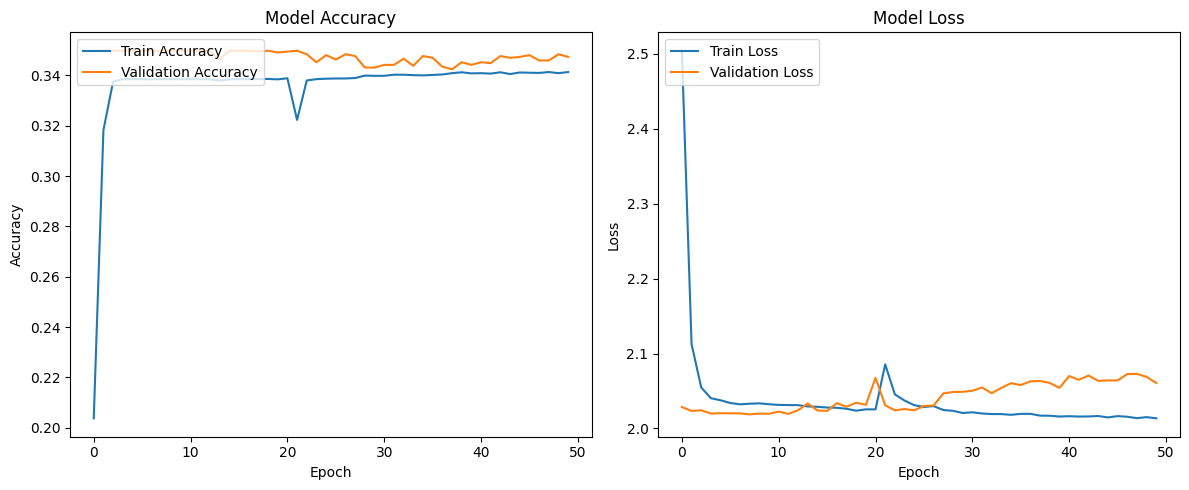

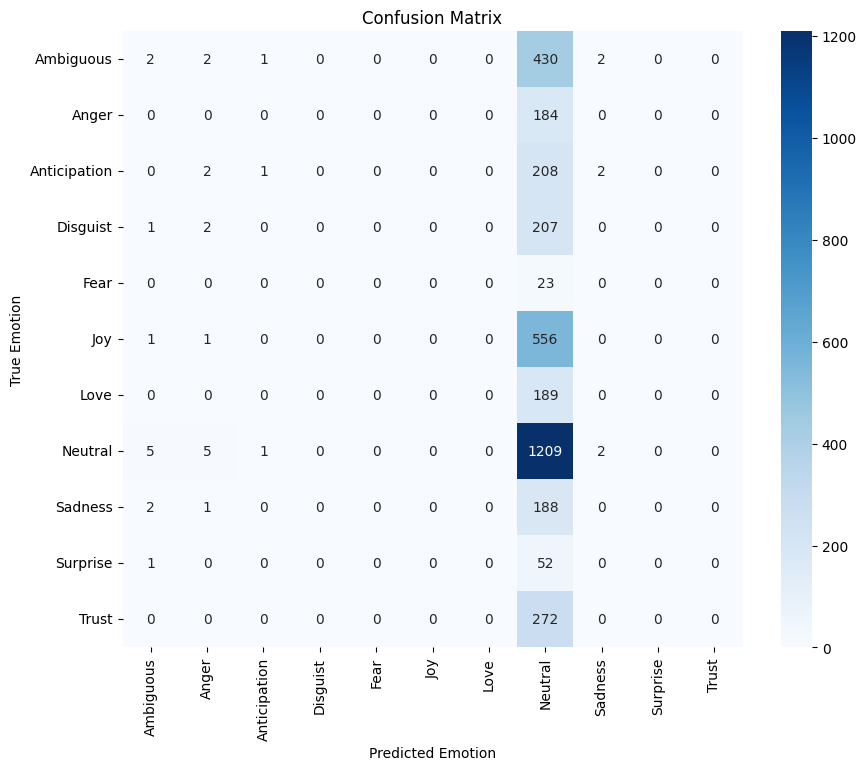

              precision    recall  f1-score   support

   Ambiguous       0.17      0.00      0.01       437
       Anger       0.00      0.00      0.00       184
Anticipation       0.33      0.00      0.01       213
    Disguist       0.00      0.00      0.00       210
        Fear       0.00      0.00      0.00        23
         Joy       0.00      0.00      0.00       558
        Love       0.00      0.00      0.00       189
     Neutral       0.34      0.99      0.51      1222
     Sadness       0.00      0.00      0.00       191
    Surprise       0.00      0.00      0.00        53
       Trust       0.00      0.00      0.00       272

    accuracy                           0.34      3552
   macro avg       0.08      0.09      0.05      3552
weighted avg       0.16      0.34      0.18      3552



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Plotting Training and Validation Accuracy and Loss
# history = model.history  # Assuming you have saved the history during training
from sklearn.metrics import confusion_matrix, classification_report
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(test_data[0], test_data['predicted_emotion'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.show()

# Classification Report
report = classification_report(test_data[0], test_data['predicted_emotion'], target_names=label_encoder.classes_)
print(report)

In [15]:
print(history.history.keys())

dict_keys([])
